In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

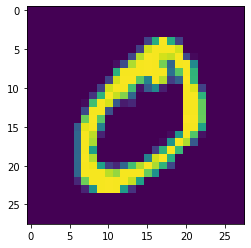

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 225s 120ms/step - loss: 0.2359 - accuracy: 0.9512 - val_loss: 0.0983 - val_accuracy: 0.9718
Epoch 2/5
1875/1875 [==============================] - 211s 112ms/step - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.0923 - val_accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.1034 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.1071 - val_accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 211s 113ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.1236 - val_accuracy: 0.9777


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.12360886484384537, 0.9776999950408936]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[1.74932326e-11 1.56668735e-22 1.31287932e-11 8.81987105e-12
  3.14485149e-16 3.94236544e-14 5.25841506e-27 1.00000000e+00
  8.32967050e-14 2.13916103e-12]
 [7.99348001e-12 2.12343129e-10 1.00000000e+00 4.88554713e-14
  1.32289910e-18 9.27523312e-16 1.65086833e-10 6.69818538e-22
  7.02107236e-14 1.99087856e-22]
 [2.17639354e-05 9.99953151e-01 2.66397660e-06 1.78986893e-12
  7.97449138e-06 1.11354259e-08 8.29378302e-11 2.25530661e-09
  1.43854813e-05 1.27887189e-11]
 [9.99997258e-01 1.51216782e-16 5.12338671e-10 9.95852706e-14
  3.63568117e-13 3.81535914e-10 9.10889852e-09 9.34724151e-16
  1.07169834e-13 2.70393207e-06]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("model.h5")

In [17]:
model=load_model("model.h5")